## PDC Project
This project aims to create a transmitter and reciever that is able to reconstruct a message that was exposed by a channel effect.

In [1]:
import client
import channel_helper
import transmitter
import reciever

import matplotlib.pyplot as plt
import numpy as np

### Transmitter
The Transmitter first creates a codeword based on the 8 Bit Ascii table. For bit syncronization a predefined pattern consisting of 8 Bit with value of 1 is used. After that the codeword is transformed into a waveform. The basis function of the waveform former is a root raised cosine function. Furthermore the value 0 in the bit sequence is replaced by -1 for a better error probability. Finally the signal is shifted in the frequency domain in order to fit the requirements of the Channel-Effect.

In [2]:
%%time 
transmitter.run()

Codeword: 
111111110100011001100001011100100010000001100110011000010111001000100000011000010111011101100001011110010010110000100000011000100110010101101000011010010110111001100100001000000111010001101000011001010010000001110111011011110111001001100100001000000110110101101111011101010110111001110100011000010110100101101110011100110010110000100000011001100110000101110010001000000110011001110010011011110110110100100000011101000110100001100101001000000110001101101111011101010110111001110100011100100110100101100101011100110010000001010110011011110110101101100001011011000110100101100001001000000110000101101110011001000010000001000011011011110110111001110011011011110110111001100001011011100111010001101001011000010010110000100000011101000110100001100101011100100110010100100000011011000110100101110110011001010010000001110100011010000110010100100000011000100110110001101001011011100110010000100000011101000110010101111000011101000111001100101110

Time for function waveform_former:
24.790001

Time 

### Channel Effect

In [3]:
!python client.py --input_file=passband.txt --output_file=output.txt --srv_hostname=iscsrv72.epfl.ch --srv_port=80

Traceback (most recent call last):
  File "client.py", line 64, in <module>
    sock_cl.connect((args.srv_hostname, args.srv_port))
ConnectionRefusedError: [Errno 61] Connection refused


### Reciever
The Reciever takes the noisy version of the signal and first shift it back to the original frequency. After that a lowpass filter is applied with is then used to filter the noise. Because the channel applies a delay on the sequence the starting position is determined by using a convolution for the bit sequence consisting of 8 pulses with itensity 1. After that the inner product is computed to reconstruct the message using a matched filter. 

In [4]:
%%time
reciever.run()

Time beginning:
0.40720899999999816

Time for function inner_product:
0.21528800000000103

Number of Correct Bits: 928/928

Decoded recieved signal: 
Far far away, behind the word mountains, far from the countries Vokalia and Consonantia, there live the blind texts.

Original text: 
Far far away, behind the word mountains, far from the countries Vokalia and Consonantia, there live the blind texts.

CPU times: user 10.7 s, sys: 170 ms, total: 10.8 s
Wall time: 6.54 s


### Plots
In the following part the plots of the passband signal (what is send to the server) and the output of the server is shown. 

In [5]:
def compute_array(datapath):
    f = open(datapath, 'r')
    array = f.read().split('\n')
    length = len(array)
    plot_array = array[:(length-1)]
    
    
    plot_array = list(map(float, plot_array))
    return plot_array


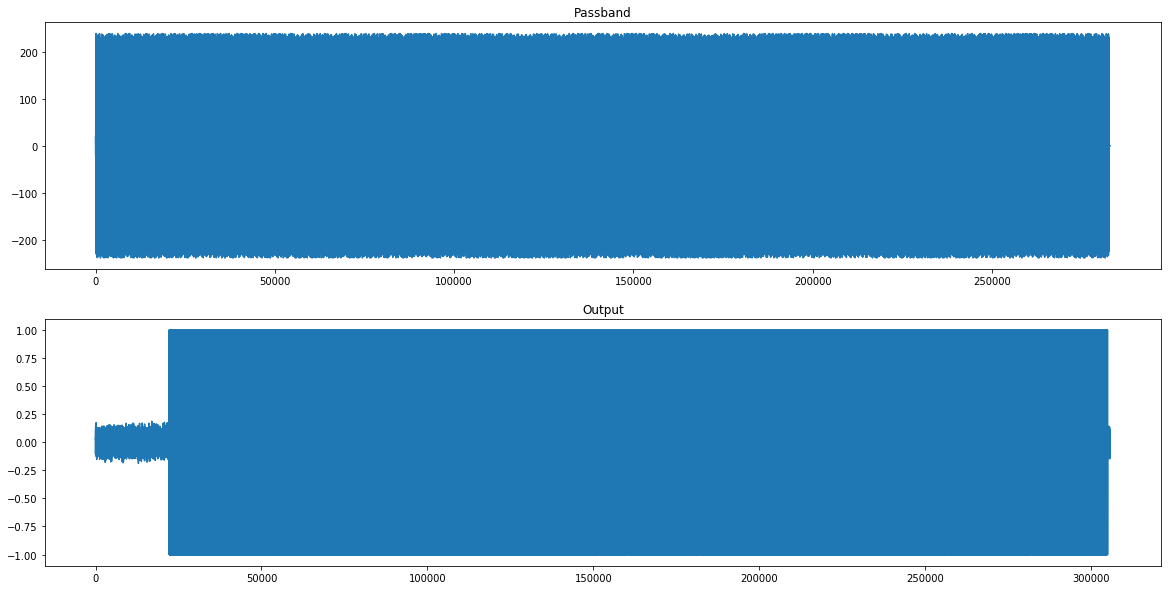

In [6]:
fig, ax = plt.subplots(2, figsize=(20,10))

passband = compute_array("passband.txt")
output = compute_array("output.txt")



ax[0].plot(passband)
ax[0].set_title('Passband')
ax[1].plot(output)
ax[1].set_title('Output')



plt.show()

### TESTS

<function matplotlib.pyplot.show(*args, **kw)>

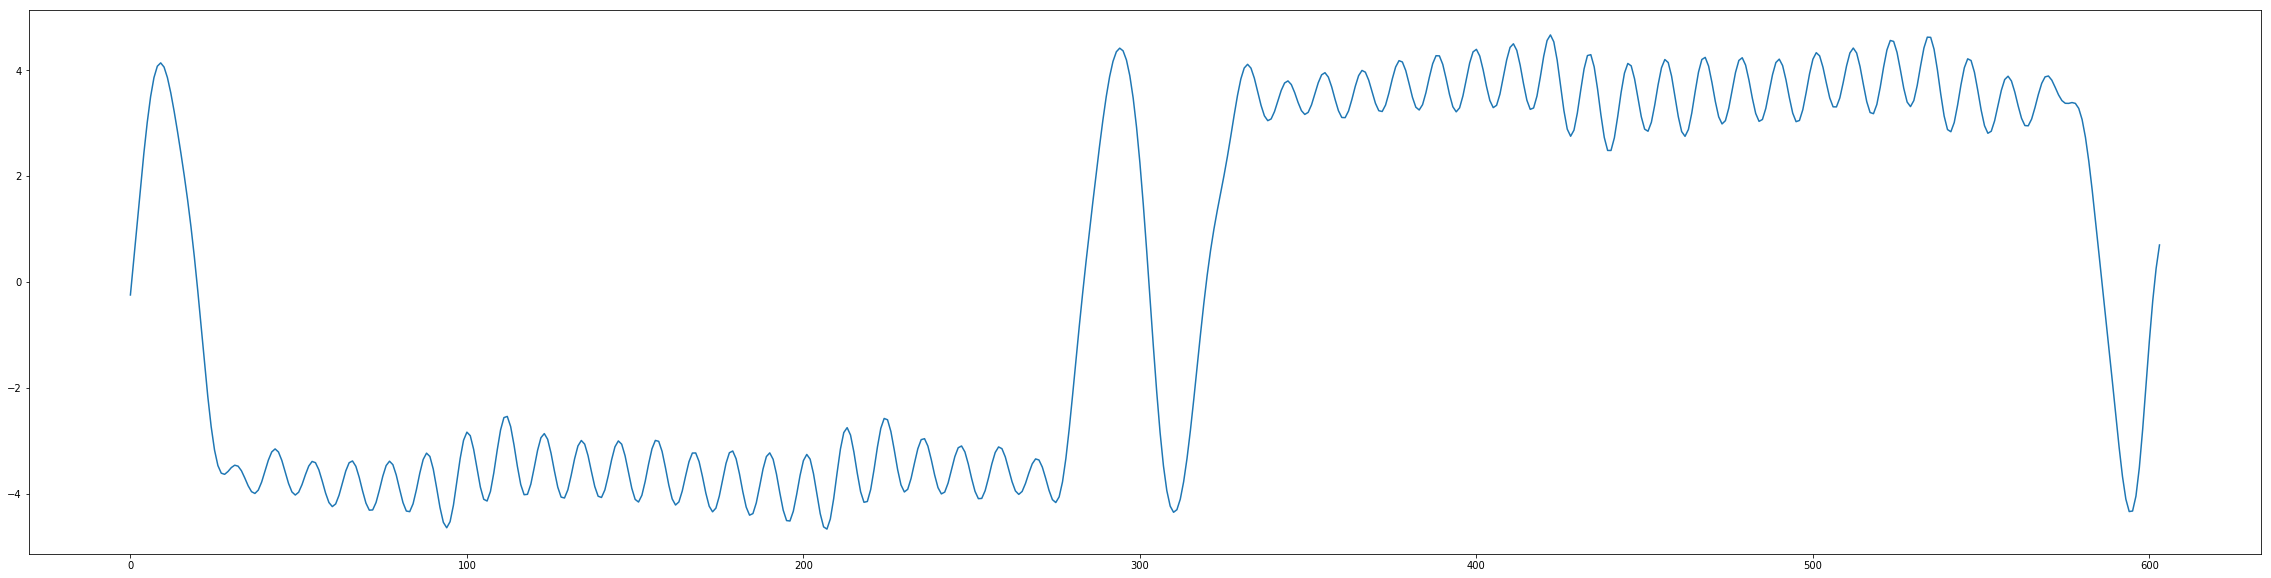

In [7]:
temp6 = compute_array("test.txt")
#detail_pt = temp6[0:10000]

plt.figure(figsize=(40,10))
plt.plot(temp6[0:604])
plt.show